In [4]:
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector

In [2]:
packageNames = ('afex', 'emmeans')
utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)

rpy2.rinterface.NULL

In [7]:
packnames_to_install = [x for x in packageNames if not rpackages.isinstalled(x)]

In [8]:
packnames_to_install

[]

In [9]:
if len(packnames_to_install) > 0:
    utils.install_packages(StrVector(packnames_to_install))

In [10]:
data = robjects.r('read.table(file =' \
       '"http://personality-project.org/r/datasets/R.appendix3.data", header = T)')

afex = rpackages.importr('afex') 
model = afex.aov_ez('Subject', 'Recall', data, within='Valence')
print(model)

Anova Table (Type 3 tests)

Response: Recall
   Effect         df  MSE          F ges p.value
1 Valence 1.15, 4.60 9.34 189.11 *** .93  <.0001
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Sphericity correction method: GG 



In [11]:
emmeans = rpackages.importr('emmeans', 
               robject_translations = {"recover.data.call": "recover_data_call1"})
pairwise = emmeans.emmeans(model, "Valence", contr="pairwise", adjust="holm")

print(pairwise)

$emmeans
 Valence emmean       SE   df  lower.CL upper.CL
 Neg       27.8 1.570563 7.33 24.119388 31.48061
 Neu       11.6 1.570563 7.33  7.919388 15.28061
 Pos       40.0 1.570563 7.33 36.319388 43.68061

Confidence level used: 0.95 

$contrasts
 contrast  estimate       SE df t.ratio p.value
 Neg - Neu     16.2 1.465151  8  11.057  <.0001
 Neg - Pos    -12.2 1.465151  8  -8.327  <.0001
 Neu - Pos    -28.4 1.465151  8 -19.384  <.0001

P value adjustment: holm method for 3 tests 




In [4]:
import rpy2.robjects as robjects
from rpy2.robjects.lib import grdevices
from rpy2.robjects.vectors import IntVector
from IPython.display import Image, display

graphics = robjects.packages.importr('graphics')

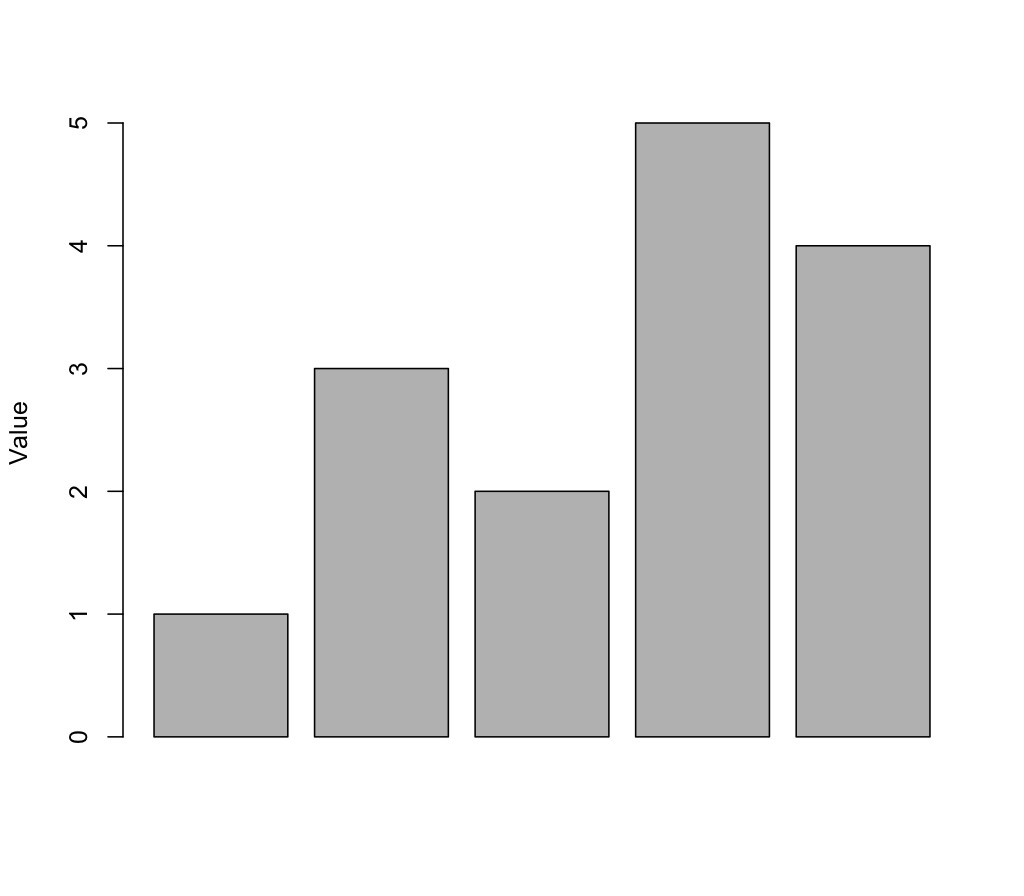

In [5]:
with grdevices.render_to_bytesio(grdevices.jpeg, width=1024, height=896, res=150) as img:
    graphics.barplot(IntVector((1,3,2,5,4)), ylab="Value")
    
display(Image(data=img.getvalue(), format='jpeg', embed=True))

In [12]:
import pandas as pd
from rpy2.robjects import r, pandas2ri

In [8]:
pandas2ri.activate()

In [22]:
r.data('iris')

'iris'


In [23]:
r['iris'].head()

TypeError: Parameter 'categories' must be list-like, was <rpy2.rinterface.StrSexpVector - Python:0x141d27558 / R:0x7f9d973fe418>

In [13]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C':[7,8,9]},
   ...:                   index=["one", "two", "three"])

In [14]:
r_dataframe = pandas2ri.py2ri(df)

In [15]:
print(r_dataframe)

      A B C
one   1 4 7
two   2 5 8
three 3 6 9



In [16]:
print(data)

   Observation Subject Valence Recall
1            1     Jim     Neg     32
2            2     Jim     Neu     15
3            3     Jim     Pos     45
4            4  Victor     Neg     30
5            5  Victor     Neu     13
6            6  Victor     Pos     40
7            7    Faye     Neg     26
8            8    Faye     Neu     12
9            9    Faye     Pos     42
10          10     Ron     Neg     22
11          11     Ron     Neu     10
12          12     Ron     Pos     38
13          13   Jason     Neg     29
14          14   Jason     Neu      8
15          15   Jason     Pos     35



In [18]:
model = afex.aov_ez('A', 'B', r_dataframe, within='C')



/usr/local/anaconda/envs/memdynstats/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in dim(ordered) <- ns : 
  dims [product 1] do not match the length of object [0]

  warnings.warn(x, RRuntimeWarning)
/usr/local/anaconda/envs/memdynstats/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: In addition: 
  warnings.warn(x, RRuntimeWarning)
/usr/local/anaconda/envs/memdynstats/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Warning message:

  warnings.warn(x, RRuntimeWarning)
/usr/local/anaconda/envs/memdynstats/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Missing values for following ID(s):
1, 2, 3
Removing those cases from the analysis. 

  warnings.warn(x, RRuntimeWarning)


RRuntimeError: Error in dim(ordered) <- ns : 
  dims [product 1] do not match the length of object [0]


In [26]:
datasets = rpackages.importr('datasets')

In [20]:
iris=datasets.iris

AttributeError: module 'datasets' has no attribute 'iris'

In [21]:
dir(datasets)

['___NAMESPACE___',
 '___S3MethodsTable___',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__rdata__',
 '__rname__',
 '__spec__',
 '__version__',
 '_env',
 '_exported_names',
 '_packageName',
 '_rpy2r',
 '_symbol_check_after',
 '_symbol_r2python',
 '_translation']

In [29]:
datasets

rpy2.robjects.packages.Package as a <module 'datasets'>

In [33]:
import rpy2.robjects as robjects
from rpy2.robjects.lib import grdevices
from rpy2.robjects.vectors import IntVector
from IPython.display import Image, display

graphics = robjects.packages.importr('graphics')

from contextlib import contextmanager

@contextmanager
def r_jupyter_plot():
    with grdevices.render_to_bytesio(grdevices.jpeg, width=1024, height=896, res=150) as img:
        yield img
    display(Image(data=img.getvalue(), format='jpeg', embed=True))

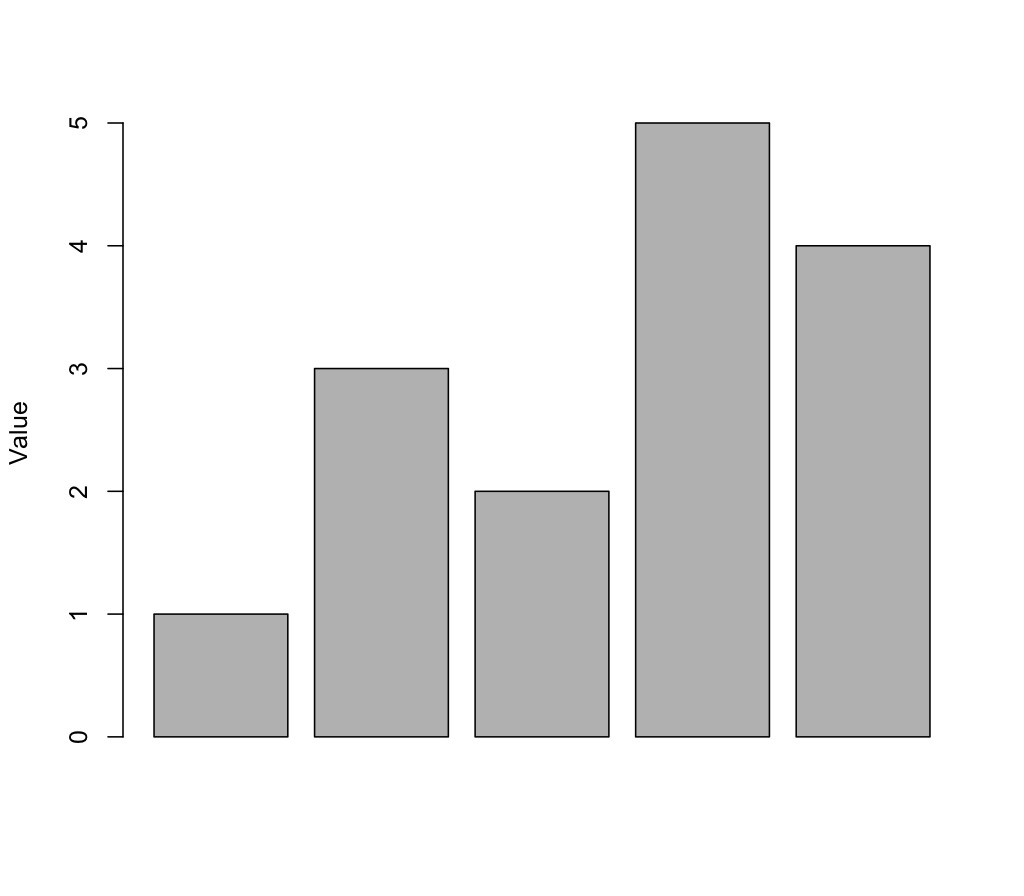

In [34]:
with r_jupyter_plot():
    graphics.barplot(IntVector((1,3,2,5,4)), ylab="Value")